## Importing libraries

In [119]:
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

## Reading data

In [120]:
#dataset_path = '/kaggle/input/car-crashes-severity-prediction/'
#df = pd.read_csv(os.path.join(dataset_path, 'train.csv'))

df = pd.read_csv('train.csv')
print("The shape of the dataset is {}.\n\n".format(df.shape))

df.head()

The shape of the dataset is (6407, 16).




,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp
0,0,37.762150,-122.405660,False,0.044,False,False,False,False,False,False,False,True,R,2,2016-03-25 15:13:02
1,1,37.719157,-122.448254,False,0.000,False,False,False,False,False,False,False,False,R,2,2020-05-05 19:23:00
2,2,37.808498,-122.366852,False,0.000,False,False,False,False,False,False,True,False,R,3,2016-09-16 19:57:16
3,3,37.785930,-122.391080,False,0.009,False,False,True,False,False,False,False,False,R,1,2020-03-29 19:48:43
4,4,37.719141,-122.448457,False,0.000,False,False,False,False,False,False,False,False,R,2,2019-10-09 08:47:00


In [121]:
df.drop(columns='ID', inplace=True)

In [122]:
def col_encode(df, col):
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])

In [123]:
def encode(df):
    col_encode(df, 'Bump')    
    col_encode(df, 'Crossing')
    col_encode(df, 'Give_Way')
    col_encode(df, 'Junction')
    col_encode(df, 'No_Exit')
    col_encode(df, 'Railway')
    col_encode(df, 'Roundabout')
    col_encode(df, 'Stop')
    col_encode(df, 'Amenity')
    col_encode(df, 'Side')
encode(df)

In [124]:
def divide_date(df):
    df['timestamp']= pd.to_datetime(df['timestamp'])
    df['new_date'] = [d.date() for d in df['timestamp']]
    df['new_date'] = pd.to_datetime(df['new_date'])
    df['new_time'] = [d.time() for d in df['timestamp']]
    df['new_hour'] = [d.hour for d in df['timestamp']]
divide_date(df)

In [125]:
df

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,new_date,new_time,new_hour
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,0,1,1,2,2016-03-25 15:13:02,2016-03-25,15:13:02,15
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,0,0,1,2,2020-05-05 19:23:00,2020-05-05,19:23:00,19
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,1,0,1,3,2016-09-16 19:57:16,2016-09-16,19:57:16,19
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,0,0,1,1,2020-03-29 19:48:43,2020-03-29,19:48:43,19
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,0,0,1,2,2019-10-09 08:47:00,2019-10-09,08:47:00,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0,0.368,0,0,0,0,0,0,0,0,1,3,2017-10-01 18:36:13,2017-10-01,18:36:13,18
6403,37.752755,-122.402790,0,0.639,0,0,1,0,0,0,0,0,1,2,2018-10-23 07:40:27,2018-10-23,07:40:27,7
6404,37.726304,-122.446015,0,0.000,0,0,1,0,0,0,0,0,1,2,2019-10-28 15:45:00,2019-10-28,15:45:00,15
6405,37.808090,-122.367211,0,0.000,0,0,1,0,0,0,0,0,1,3,2019-05-04 13:45:31,2019-05-04,13:45:31,13


## Reading holidays file

In [126]:
import xml.etree.ElementTree as Xet

cols = ["date", "is_holiday"]
rows = []
  
#xmlparse = Xet.parse('/kaggle/input/car-crashes-severity-prediction/holidays.xml')
xmlparse = Xet.parse('holidays.xml')

root = xmlparse.getroot()
for i in root:
    date = i.find("date").text
    description = i.find("description").text
  
    rows.append({"date": date,
                 "description": description})

df_holidays = pd.DataFrame(rows, columns=cols)
 
df_holidays['is_holiday']= np.array([1]*90)
df_holidays['date'] = pd.to_datetime(df_holidays['date']) 
df_holidays.head()

,date,is_holiday
0,2012-01-02,1
1,2012-01-16,1
2,2012-02-20,1
3,2012-05-28,1
4,2012-07-04,1


## Integrating holiday file

In [127]:
df = pd.merge(left=df, right=df_holidays, how='left', left_on='new_date', right_on='date')
df['is_holiday'] = df['is_holiday'].fillna(0)
df.drop(['date'], axis=1,inplace=True)

In [128]:
df

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,Severity,timestamp,new_date,new_time,new_hour,is_holiday
0,37.762150,-122.405660,0,0.044,0,0,0,0,0,0,0,1,1,2,2016-03-25 15:13:02,2016-03-25,15:13:02,15,0.0
1,37.719157,-122.448254,0,0.000,0,0,0,0,0,0,0,0,1,2,2020-05-05 19:23:00,2020-05-05,19:23:00,19,0.0
2,37.808498,-122.366852,0,0.000,0,0,0,0,0,0,1,0,1,3,2016-09-16 19:57:16,2016-09-16,19:57:16,19,0.0
3,37.785930,-122.391080,0,0.009,0,0,1,0,0,0,0,0,1,1,2020-03-29 19:48:43,2020-03-29,19:48:43,19,0.0
4,37.719141,-122.448457,0,0.000,0,0,0,0,0,0,0,0,1,2,2019-10-09 08:47:00,2019-10-09,08:47:00,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,37.740630,-122.407930,0,0.368,0,0,0,0,0,0,0,0,1,3,2017-10-01 18:36:13,2017-10-01,18:36:13,18,0.0
6403,37.752755,-122.402790,0,0.639,0,0,1,0,0,0,0,0,1,2,2018-10-23 07:40:27,2018-10-23,07:40:27,7,0.0
6404,37.726304,-122.446015,0,0.000,0,0,1,0,0,0,0,0,1,2,2019-10-28 15:45:00,2019-10-28,15:45:00,15,0.0
6405,37.808090,-122.367211,0,0.000,0,0,1,0,0,0,0,0,1,3,2019-05-04 13:45:31,2019-05-04,13:45:31,13,0.0


## Reading and integrating weather file

In [129]:
#weather = pd.read_csv(os.path.join(dataset_path,'weather-sfcsv.csv' ))
weather = pd.read_csv('weather-sfcsv.csv')
#weather['Selected']= weather['Selected'].astype("|S")
#weather['Weather_Condition']= weather['Weather_Condition'].astype("|S")

col_encode(weather, 'Weather_Condition')
weather['weather_date'] = pd.to_datetime(weather[['Year', 'Day', 'Month']])


weather.drop_duplicates(subset =['Year', 'Day', 'Month','Hour'],inplace=True)

weather['Wind_Chill(F)'].fillna(weather['Wind_Chill(F)'].mean(),inplace=True)
weather['Precipitation(in)'].fillna(weather['Precipitation(in)'].mean(),inplace=True)
weather['Temperature(F)'].fillna(weather['Temperature(F)'].mean(),inplace=True)
weather['Humidity(%)'].fillna(weather['Humidity(%)'].mean(),inplace=True)
weather['Wind_Speed(mph)'].fillna(weather['Wind_Speed(mph)'].mean(),inplace=True)
weather['Visibility(mi)'].fillna(weather['Visibility(mi)'].mean(),inplace=True)

df = pd.merge(left=df, right=weather, how='left', left_on=['new_date','new_hour'], right_on=['weather_date','Hour'])


In [130]:
df = df.drop(['timestamp', 'new_date', 'weather_date', 'new_time','new_hour','Selected'], axis=1)
df = df.dropna()

In [131]:
df.shape

(6407, 26)

In [106]:
df.describe(include='all')

,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,...,Day,Month,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi)
count,6407.000000,6407.000000,6407.0,6407.000000,6407.00000,6407.000000,6407.000000,6407.000000,6407.000000,6407.0,...,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000,6407.000000
mean,37.765653,-122.405990,0.0,0.135189,0.08241,0.000468,0.246449,0.000156,0.026533,0.0,...,15.656626,6.744498,12.873888,11.083346,59.792840,0.006132,59.938967,68.179719,10.862157,9.440446
std,0.032555,0.028275,0.0,0.396360,0.27501,0.021635,0.430977,0.012493,0.160728,0.0,...,8.750849,3.568445,5.824203,6.907483,6.550781,0.020930,7.945230,16.163416,6.348423,1.647513
min,37.609619,-122.510440,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,0.000000,0.000000,31.100000,0.000000,36.000000,10.000000,0.000000,0.120000
25%,37.737096,-122.412210,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,8.000000,4.000000,8.000000,3.000000,59.000000,0.000000,54.000000,59.000000,6.000000,10.000000
50%,37.768238,-122.404835,0.0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,16.000000,7.000000,14.000000,14.000000,59.642364,0.006013,59.000000,70.000000,10.000000,10.000000
75%,37.787813,-122.392477,0.0,0.041000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,...,23.000000,10.000000,17.000000,17.000000,59.642364,0.006013,64.900000,80.000000,15.000000,10.000000
max,37.825626,-122.349734,0.0,6.820000,1.00000,1.000000,1.000000,1.000000,1.000000,0.0,...,31.000000,12.000000,23.000000,26.000000,98.000000,0.490000,98.000000,100.000000,40.300000,10.000000


## Applying PCA

In [132]:
from sklearn.decomposition import PCA
pca = PCA(n_components=26)
pca.fit(df)
print(pca.explained_variance_ratio_)

[5.24875712e-01 1.31254448e-01 1.05286071e-01 8.56904784e-02
 6.14099104e-02 4.54807702e-02 2.18699529e-02 1.58007403e-02
 4.21302720e-03 2.58364672e-03 4.60451537e-04 3.28140183e-04
 2.66251534e-04 1.47839212e-04 1.35933831e-04 7.26139562e-05
 4.90446135e-05 3.82083230e-05 3.25512615e-05 1.70249975e-06
 8.77836817e-07 7.80191364e-07 5.80492791e-07 2.66817054e-07
 3.41846894e-33 3.41846894e-33]


## Plotting correlation heat map

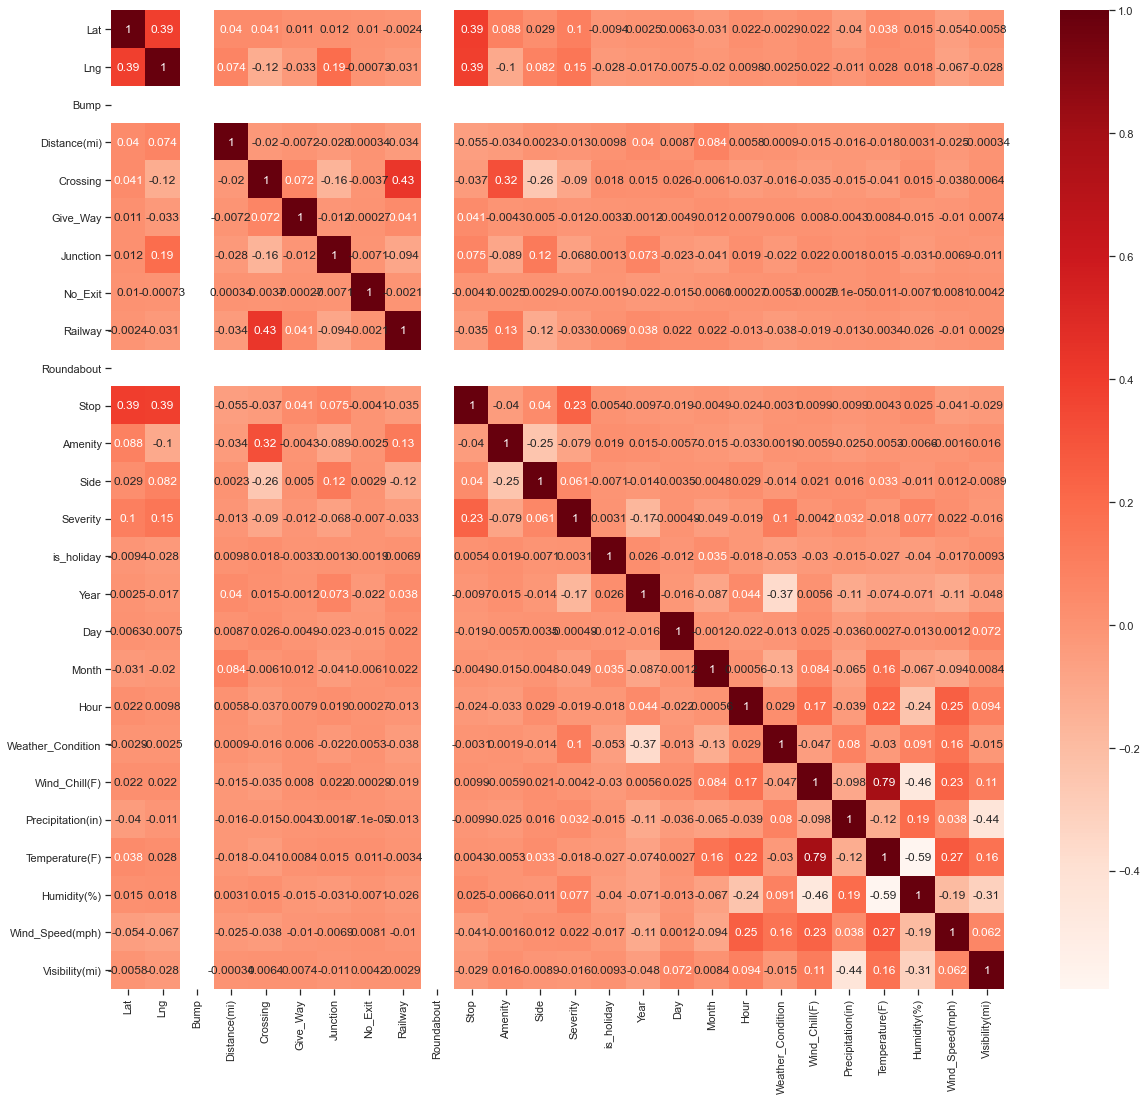

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,18))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Splitting data

In [134]:
from sklearn.model_selection import train_test_split

train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_df.drop(columns=['Severity'])
y_train = train_df['Severity']

X_val = val_df.drop(columns=['Severity'])
y_val = val_df['Severity']

## Model Training

Let's train a model with the data! We'll train a Random Forest Classifier to demonstrate the process of making submissions.

In [135]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the classifier
classifier = RandomForestClassifier(max_depth=2, random_state=0)

# Train the classifier
classifier = classifier.fit(X_train, y_train)

In [136]:
print("The accuracy of the classifier on the validation set is ", (classifier.score(X_val, y_val)))

The accuracy of the classifier on the validation set is  0.7472698907956318


## Model Testing

In [137]:
#test_df = pd.read_csv(os.path.join(dataset_path, 'test.csv'))
test_df = pd.read_csv('test.csv')
test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Stop,Amenity,Side,timestamp
0,6407,37.786060,-122.390900,False,0.039,False,False,True,False,False,False,False,False,R,2016-04-04 19:20:31
1,6408,37.769609,-122.415057,False,0.202,False,False,False,False,False,False,False,False,R,2020-10-28 11:51:00
2,6409,37.807495,-122.476021,False,0.000,False,False,False,False,False,False,False,False,R,2019-09-09 07:36:45
3,6410,37.761818,-122.405869,False,0.000,False,False,True,False,False,False,False,False,R,2019-08-06 15:46:25
4,6411,37.732350,-122.414100,False,0.670,False,False,False,False,False,False,False,False,R,2018-10-17 09:54:58


In [139]:
test_df.drop(columns='ID').describe()
encode(test_df)
divide_date(test_df)
test_df = pd.merge(left=test_df, right=weather, how='left', left_on=['new_date','new_hour'], right_on=['weather_date','Hour'])
test_df = pd.merge(left=test_df, right=df_holidays, how='left', left_on='new_date', right_on='date')
test_df['is_holiday'] = test_df['is_holiday'].fillna(0)
test_df.drop(['date'], axis=1,inplace=True)
test_df = test_df.drop(['timestamp', 'new_date', 'weather_date', 'new_time','new_hour','Selected'], axis=1)
test_df = test_df.dropna()

In [140]:
X_test = test_df.drop(columns=['ID'])

# You should update/remove the next line once you change the features used for training
# X_test = X_test[['Lat', 'Lng', 'Distance(mi)']]

y_test_predicted = classifier.predict(X_test)

test_df['Severity'] = y_test_predicted

test_df.head()

,ID,Lat,Lng,Bump,Distance(mi),Crossing,Give_Way,Junction,No_Exit,Railway,...,Hour,Weather_Condition,Wind_Chill(F),Precipitation(in),Temperature(F),Humidity(%),Wind_Speed(mph),Visibility(mi),is_holiday,Severity
0,6407,37.786060,-122.390900,0,0.039,0,0,1,0,0,...,19,17,59.642364,0.006013,63.0,60.0,10.4,10.0,0.0,2
1,6408,37.769609,-122.415057,0,0.202,0,0,0,0,0,...,11,3,65.000000,0.000000,65.0,56.0,5.0,9.0,0.0,2
2,6409,37.807495,-122.476021,0,0.000,0,0,0,0,0,...,7,14,58.000000,0.000000,58.0,90.0,18.0,10.0,0.0,2
3,6410,37.761818,-122.405869,0,0.000,0,0,1,0,0,...,15,3,72.000000,0.000000,72.0,59.0,17.0,10.0,0.0,2
4,6411,37.732350,-122.414100,0,0.670,0,0,0,0,0,...,9,22,59.642364,0.006013,57.0,77.0,5.8,10.0,0.0,2


In [ ]:
#test_df[['ID', 'Severity']].to_csv('/kaggle/working/submission.csv', index=False)